### Data Cleaning Notebook: For a dataset with zipcode as rows, we did dummied the ratings and Price.
### For the categories I used countvectorizer to assign the matrix to the original data set.
### As the Countvecrizer does not perform well, I saved the data with two copies, one with countvecrizer one without

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [2]:
df= pd.read_csv('../data/data_income.csv')
df.head()

,Unnamed: 0,alias,category,city,id,latitude,longitude,price,rating,review_count,zip_code,price*rating,ave_agi,count
0,0,重庆特色小面-chongqing-special-noodles-san-gabriel-3,"['noodles', 'chinese']",San Gabriel,mm6l24khOfXhKqn4pKVojA,34.103070,-118.091840,1,4.0,204.0,91776,4.0,37.21102,166
1,1,yung-ho-cafe-san-gabriel-2,"['taiwanese', 'chinese', 'breakfast_brunch']",San Gabriel,zO8V4fi49QQMn4Sa_0OS9g,34.081429,-118.084785,1,3.0,263.0,91776,3.0,37.21102,166
2,2,yuk-dae-jang-san-gabriel-2,['korean'],San Gabriel,DwvljRkxkMEljQBYX-MeTw,34.102080,-118.109870,2,4.5,157.0,91776,9.0,37.21102,166
3,3,young-dong-tofu-house-san-gabriel-2,"['korean', 'soup', 'bbq']",San Gabriel,ArjemSkdDmtaSOJ05ayM6Q,34.104029,-118.087644,2,4.0,2235.0,91776,8.0,37.21102,166
4,4,yoshino-sushi-san-gabriel,"['sushi', 'japanese']",San Gabriel,tD6NoOzVpVuhzRVdCU7POQ,34.080471,-118.092799,2,3.5,923.0,91776,7.0,37.21102,166


In [3]:
df.shape

(34095, 14)

In [4]:
df.drop(columns = ['id','Unnamed: 0'], inplace = True)

## change the data set from restaurant based to zipcode based

In [5]:
df_pivot = df.pivot_table(index = ['zip_code'])
df_pivot.head()

,ave_agi,count,latitude,longitude,price,price*rating,rating,review_count
zip_code,,,,,,,,
90001,25.152933,178,33.976255,-118.249135,1.280899,4.735955,3.615169,50.129213
90002,24.410496,41,33.952192,-118.245547,1.097561,3.804878,3.365854,28.463415
90003,23.404622,142,33.972702,-118.271297,1.197183,3.887324,3.274648,35.859155
90004,59.128947,285,34.075288,-118.306200,1.557895,6.122807,3.866667,260.214035
90005,45.821128,231,34.059329,-118.303066,1.645022,6.233766,3.757576,385.683983


##  Create New column for the combo of Price*review_count

In [6]:
df_pivot['price*review_count']=df_pivot['price']*df_pivot['review_count']

In [7]:
df_pivot.head()

,ave_agi,count,latitude,longitude,price,price*rating,rating,review_count,price*review_count
zip_code,,,,,,,,,
90001,25.152933,178,33.976255,-118.249135,1.280899,4.735955,3.615169,50.129213,64.210453
90002,24.410496,41,33.952192,-118.245547,1.097561,3.804878,3.365854,28.463415,31.240333
90003,23.404622,142,33.972702,-118.271297,1.197183,3.887324,3.274648,35.859155,42.929974
90004,59.128947,285,34.075288,-118.306200,1.557895,6.122807,3.866667,260.214035,405.386076
90005,45.821128,231,34.059329,-118.303066,1.645022,6.233766,3.757576,385.683983,634.458500


## Breakdown the price from original Pivot table(average) to count how many we have for each price category

In [8]:
count_price = (pd.crosstab(df["zip_code"], df['price']))
count_price.columns = ['price_1','price_2','price_3','price_4']
count_price.head()

,price_1,price_2,price_3,price_4
zip_code,,,,
90001,128,50,0,0
90002,37,4,0,0
90003,120,18,2,2
90004,134,143,8,0
90005,85,143,3,0


In [9]:
#Break Down for Rating column to see 

In [10]:
count_rating = (pd.crosstab(df["zip_code"], df['rating']))
count_rating.columns = ['rating_0.0','rating_1.0','rating_1.5','rating_2.0','rating_2.5','rating_3.0','rating_3.5','rating_4.0','rating_4.5','rating_5']
count_rating.head()

,rating_0.0,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5
zip_code,,,,,,,,,,
90001,0,0,8,16,18,17,26,36,33,24
90002,0,0,6,8,2,0,2,11,6,6
90003,0,4,14,20,14,14,18,20,20,18
90004,0,0,1,2,18,26,52,112,53,21
90005,0,2,2,4,7,31,40,98,45,2


## combine price and rating to zipcode file

In [11]:
df_count = pd.merge(count_price, count_rating, left_on = 'zip_code', right_on = 'zip_code')
df_count.head()

,price_1,price_2,price_3,price_4,rating_0.0,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5
zip_code,,,,,,,,,,,,,,
90001,128,50,0,0,0,0,8,16,18,17,26,36,33,24
90002,37,4,0,0,0,0,6,8,2,0,2,11,6,6
90003,120,18,2,2,0,4,14,20,14,14,18,20,20,18
90004,134,143,8,0,0,0,1,2,18,26,52,112,53,21
90005,85,143,3,0,0,2,2,4,7,31,40,98,45,2


In [12]:
df_count.shape

(328, 14)

In [13]:
df_pivot.shape

(328, 9)

## Below is the data without countvecrizer the catogory

In [14]:
df_dummy = pd.merge(df_pivot, df_count, on="zip_code")
df_dummy.drop(columns = ['price','rating'] ,inplace = True)
df_dummy.reset_index(inplace = True)
df_dummy.head()

,zip_code,ave_agi,count,latitude,longitude,price*rating,review_count,price*review_count,price_1,price_2,...,rating_0.0,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5
0,90001,25.152933,178,33.976255,-118.249135,4.735955,50.129213,64.210453,128,50,...,0,0,8,16,18,17,26,36,33,24
1,90002,24.410496,41,33.952192,-118.245547,3.804878,28.463415,31.240333,37,4,...,0,0,6,8,2,0,2,11,6,6
2,90003,23.404622,142,33.972702,-118.271297,3.887324,35.859155,42.929974,120,18,...,0,4,14,20,14,14,18,20,20,18
3,90004,59.128947,285,34.075288,-118.306200,6.122807,260.214035,405.386076,134,143,...,0,0,1,2,18,26,52,112,53,21
4,90005,45.821128,231,34.059329,-118.303066,6.233766,385.683983,634.458500,85,143,...,0,2,2,4,7,31,40,98,45,2


In [15]:
df_dummy.to_csv('../data/data_nocv.csv')

# Making the category a matrix via countvectrizor 

In [16]:
cate_dict = df['category'].to_dict()

In [17]:
for i in cate_dict:
    cate_dict[i] = cate_dict[i].replace('[', '')
    cate_dict[i] = cate_dict[i].replace(']', '')
    cate_dict[i] = cate_dict[i].replace('\'', '')
    cate_dict[i] = cate_dict[i].split(', ')

In [18]:
df_cate= pd.DataFrame.from_dict(cate_dict, orient = 'index')
df_cate.head()

,0,1,2,3,4
0,noodles,chinese,None,None,None
1,taiwanese,chinese,breakfast_brunch,None,None
2,korean,None,None,None,None
3,korean,soup,bbq,None,None
4,sushi,japanese,None,None,None


In [19]:
df_cate['zip_code'] = df['zip_code']
df_cate

,0,1,2,3,4,zip_code
0,noodles,chinese,None,None,None,91776
1,taiwanese,chinese,breakfast_brunch,None,None,91776
2,korean,None,None,None,None,91776
3,korean,soup,bbq,None,None,91776
4,sushi,japanese,None,None,None,91776
...,...,...,...,...,...,...
34090,burgers,hotdogs,None,None,None,93955
34091,burgers,hotdogs,None,None,None,93955
34092,tradamerican,None,None,None,None,92397
34093,foodstands,None,None,None,None,92056


In [20]:
categories_df = df_cate.astype(str).groupby('zip_code').agg(lambda x: ' '.join(x.unique())) ##borrowwed from Erin Hwang 

In [21]:
categories_df['cate_text_by_zip'] = categories_df[0] + ' ' + categories_df[1] + ' ' + categories_df[2] + ' ' + categories_df[3] + ' ' + categories_df[4]
categories_df.head()##borrowwed from Erin Hwang

,0,1,2,3,4,cate_text_by_zip
zip_code,,,,,,
90001,foodtrucks chicken_wings donuts hotdogs street...,comfortfood None coffee asianfusion japanese v...,sandwiches None hotdog food catering mexican m...,None,None,foodtrucks chicken_wings donuts hotdogs street...
90002,coffee hotdogs mexican tacos sandwiches salvad...,breakfast_brunch burgers None foodstands hotdo...,None coffee mexican chicken_wings breakfast_br...,None,None,coffee hotdogs mexican tacos sandwiches salvad...
90003,sportsbars japanese donuts soulfood burgers ta...,None sandwiches coffee mexican hotdogs foodsta...,None coffee sandwiches meats customcakes chick...,None,None,sportsbars japanese donuts soulfood burgers ta...
90004,korean japanese desserts bbq streetvendors piz...,chinese None coffee noodles korean seafood mex...,noodles None korean smokehouse raw_food italia...,None,None,korean japanese desserts bbq streetvendors piz...
90005,korean donuts coffee hotdogs chinese thai chic...,None noodles coffee bubbletea asianfusion chic...,None sandwiches juicebars italian korean sushi...,None,None,korean donuts coffee hotdogs chinese thai chic...


In [22]:
cvec = CountVectorizer()

In [23]:
categories_df.reset_index(inplace = True)

In [24]:
X = categories_df['cate_text_by_zip']
y = categories_df['zip_code']

In [25]:
df_cate = pd.DataFrame(cvec.fit_transform(X).toarray(),
                columns=cvec.get_feature_names() ) #
df_cate.head()

,acaibowls,accessories,acupuncture,afghani,african,airportlounges,amusementparks,antiques,appliances,arabian,...,whiskeybars,wholesale_stores,wholesalers,wine_bars,wineries,winetasteclasses,winetastingroom,womenscloth,wraps,yoga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## save the data with countvecrizer

In [26]:
df = pd.concat([df_dummy, df_cate], axis=1, sort=False)
df.head()

,zip_code,ave_agi,count,latitude,longitude,price*rating,review_count,price*review_count,price_1,price_2,...,whiskeybars,wholesale_stores,wholesalers,wine_bars,wineries,winetasteclasses,winetastingroom,womenscloth,wraps,yoga
0,90001,25.152933,178,33.976255,-118.249135,4.735955,50.129213,64.210453,128,50,...,0,0,0,0,0,0,0,0,0,0
1,90002,24.410496,41,33.952192,-118.245547,3.804878,28.463415,31.240333,37,4,...,0,0,0,0,0,0,0,0,0,0
2,90003,23.404622,142,33.972702,-118.271297,3.887324,35.859155,42.929974,120,18,...,0,0,0,0,0,0,0,0,0,0
3,90004,59.128947,285,34.075288,-118.306200,6.122807,260.214035,405.386076,134,143,...,0,0,0,0,0,0,0,0,0,0
4,90005,45.821128,231,34.059329,-118.303066,6.233766,385.683983,634.458500,85,143,...,0,0,0,1,0,0,0,0,0,0


In [27]:
df.to_csv('../data/data_cv.csv')

In [28]:
#count_price_rating = (pd.crosstab(df["zip_code"], df['price*rating']))
#count_price_rating.head()

In [29]:
#numeric_data = df._get_numeric_data().columns

## Begin to Model

In [30]:
X = df_dummy.drop(columns=['ave_agi','latitude','longitude']) #_get_numeric_data()
#features = list(X.columns)
y = df_dummy['ave_agi']

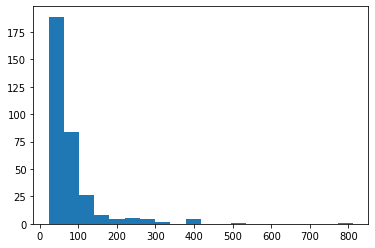

In [31]:
plt.hist(df["ave_agi"], bins=20);

In [32]:
y = np.log(df["ave_agi"])  #y = np.log(df.copy()["ave_agi"])

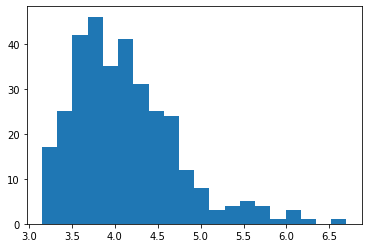

In [33]:
plt.hist(y, bins=20);

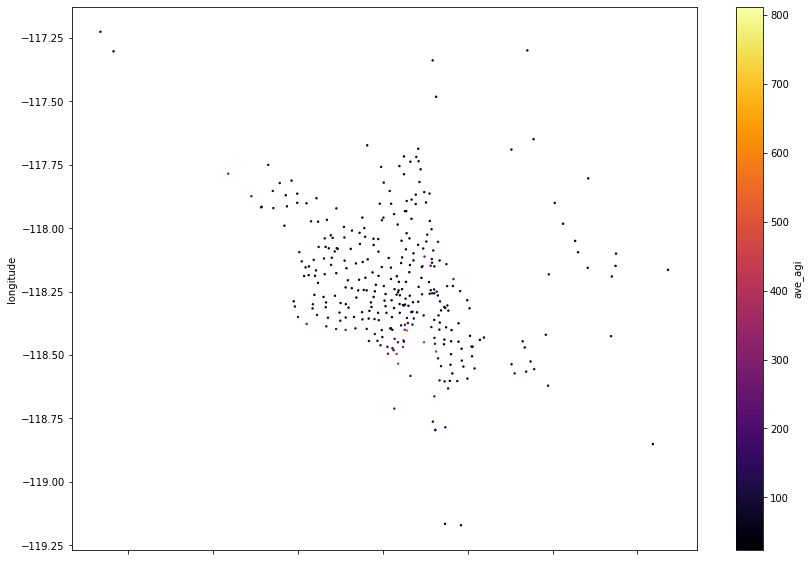

In [34]:
df.plot(kind="scatter", x="latitude", y="longitude", c="ave_agi",
         cmap="inferno", figsize=(14, 10), s=2);

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.25
)

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lr.score(X_train, y_train)

0.5410907626372141

In [39]:
lr.score(X_test,y_test)

0.5609650509474184

In [40]:
location_data = df[["latitude", "longitude"]]
location_data.head()

,latitude,longitude
0,33.976255,-118.249135
1,33.952192,-118.245547
2,33.972702,-118.271297
3,34.075288,-118.306200
4,34.059329,-118.303066


In [41]:
km = KMeans(n_clusters=97)
km.fit(location_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=97, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

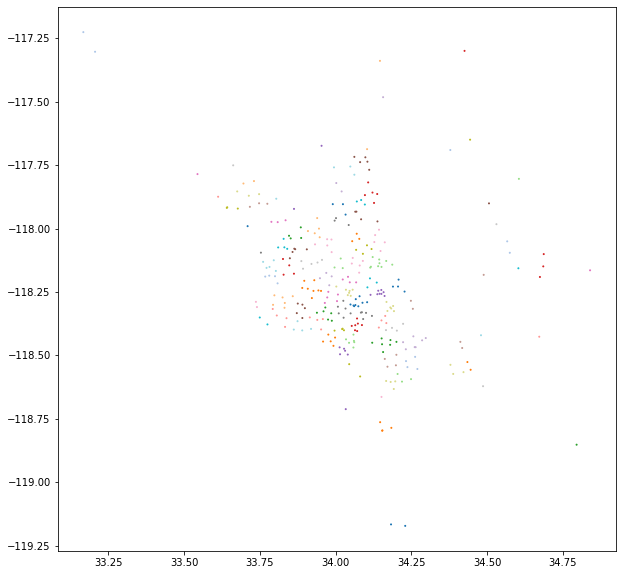

In [42]:
plt.figure(figsize=(10, 10))
plt.scatter(df.latitude, df.longitude, c=km.labels_, s=1, cmap="tab20");

In [43]:
X.loc[:, "cluster"] = km.predict(location_data)
X = pd.get_dummies(columns=["cluster"], data=X)
X.head()

,zip_code,count,price*rating,review_count,price*review_count,price_1,price_2,price_3,price_4,rating_0.0,...,cluster_87,cluster_88,cluster_89,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96
0,90001,178,4.735955,50.129213,64.210453,128,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90002,41,3.804878,28.463415,31.240333,37,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90003,142,3.887324,35.859155,42.929974,120,18,2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,90004,285,6.122807,260.214035,405.386076,134,143,8,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90005,231,6.233766,385.683983,634.458500,85,143,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.25
)

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-6.8786699334384424e+16

In [46]:
def transfer_tune(X, y, k):
    location_data = df[["latitude", "longitude"]]
    km = KMeans(n_clusters=k)
    km.fit(location_data)
    X.loc[:, "cluster"] = km.predict(location_data)
    X_dummy = pd.get_dummies(columns=["cluster"], data=X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_dummy.copy(), y.copy(), random_state=42, test_size=0.5
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    print(f"{k} : {r2}")

In [47]:
for k in range(2, 103, 5):
    transfer_tune(X, y, k)

2 : -6000025942081245.0
7 : -3.128692389426978e+17
12 : 0.20686008009232404
17 : 0.297371978811641
22 : -1.4067563156009944e+17
27 : 0.19852453617240584
32 : 0.4047337226050842
37 : 0.24562908114438867
42 : -1.7949866014714462e+16
47 : -6174639643632.813
52 : -1337087700609508.2
57 : -3.594310319434153e+16
62 : -3843703492469874.0
67 : -568095269381092.2
72 : -2010262578833233.8
77 : -7.938633421998458e+17
82 : -9.005007129611886e+17
87 : -2.663945784645877e+16
92 : -4.2361378881558436e+18
97 : -1.4911473818559996e+16
102 : -19760274029667.2
